In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
df_country_data = pd.read_csv('Country.csv')

print(df_country_data)

              country  amount date_of_payment
0         Netherlands    7.99       2/15/2007
1         Netherlands    1.99       2/16/2007
2         Netherlands    7.99       2/16/2007
3         Netherlands    2.99       2/19/2007
4         Netherlands    7.99       2/20/2007
...               ...     ...             ...
14591     South Korea    2.99       5/14/2007
14592         Germany    0.99       5/14/2007
14593  United Kingdom    4.99       5/14/2007
14594     Philippines    0.99       5/14/2007
14595           Japan    2.99       5/14/2007

[14596 rows x 3 columns]


In [2]:
# Output first 20 rows first 
print( df_country_data.head(20))

        country  amount date_of_payment
0   Netherlands    7.99       2/15/2007
1   Netherlands    1.99       2/16/2007
2   Netherlands    7.99       2/16/2007
3   Netherlands    2.99       2/19/2007
4   Netherlands    7.99       2/20/2007
5   Netherlands    5.99       2/21/2007
6        Brazil    5.99       2/17/2007
7        Brazil    5.99       2/20/2007
8        Brazil    2.99       2/20/2007
9        Mexico    4.99       2/16/2007
10       Mexico    6.99       2/16/2007
11       Mexico    0.99       2/17/2007
12       Mexico    0.99       2/17/2007
13       Mexico    6.99       2/18/2007
14       Mexico    8.99       2/20/2007
15       Mexico    0.99       2/21/2007
16        Tonga    3.99       2/15/2007
17        Tonga    4.99       2/15/2007
18        Tonga    0.99       2/16/2007
19     Paraguay    0.99       2/15/2007


In [3]:
# Print a concise summary of a DataFrame
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          14596 non-null  object 
 1   amount           14596 non-null  float64
 2   date_of_payment  14596 non-null  object 
dtypes: float64(1), object(2)
memory usage: 342.2+ KB


In [4]:
# Generate descriptive statistics.
df_country_data.describe()

,amount
count,14596.000000
mean,4.200606
std,2.368946
min,0.000000
25%,2.990000
50%,3.990000
75%,4.990000
max,11.990000


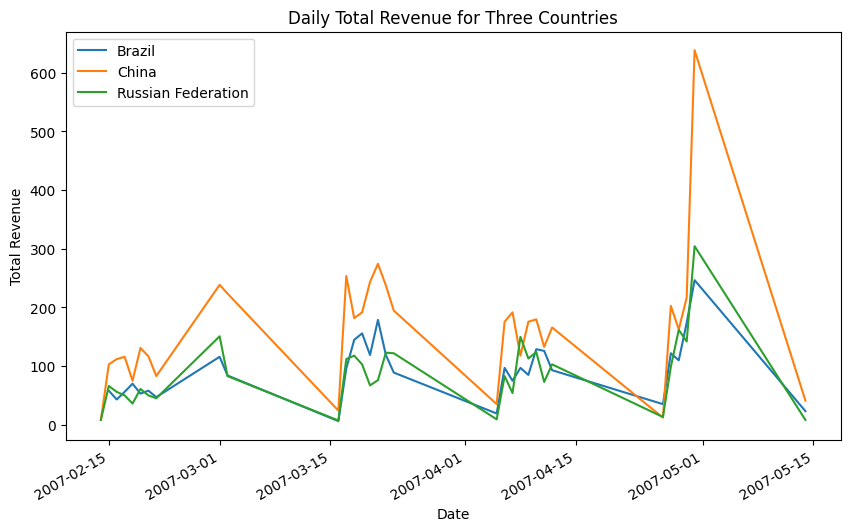

In [8]:
#Task1
#Create a time-series plot showing daily total revenue for three different countries with three countries in one plot 
#(you will want matplotlib for this)

# Convert the 'Date' column to datetime format
df_country_data['date_of_payment'] = pd.to_datetime(df_country_data['date_of_payment'])

# Group the data by 'Country' and 'Date' and calculate the sum of 'Amount'
grouped_data = df_country_data.groupby(['country', 'date_of_payment']).sum().reset_index()

# Filter the data for the three countries you're interested in
countries = ['China', 'Brazil', 'Russian Federation']
filtered_data = grouped_data[grouped_data['country'].isin(countries)]

# # Pivot the data to have countries as columns and dates as rows
pivot_data = filtered_data.pivot(index='date_of_payment', columns='country', values='amount')

# # Plot the time-series data
pivot_data.plot(figsize=(10, 6))

# # Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Total Revenue for Three Countries')
plt.legend()

# # Display the plot
plt.show()

In [35]:
#Task2
#Carry out a sentiment analysis on movie descriptions adding another column to the data frame that provides a sentiment classification. 
#This can be based on a “rules based system” that you coded OR inference from a LLM such as using the API for chatgpt.

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


movies_df = pd.read_csv('T2_movie_description.csv') 
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on compound score
def get_sentiment_class(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to movie descriptions
movies_df['sentiment_score'] = movies_df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])
movies_df['sentiment_classification'] = movies_df['sentiment_score'].apply(get_sentiment_class)

# Print the updated DataFrame
print(movies_df.head(30))

    film_id                 title  \
0       133       Chamber Italian   
1       384      Grosse Wonderful   
2         8       Airport Pollock   
3        98     Bright Encounters   
4         1      Academy Dinosaur   
5         2        Ace Goldfinger   
6         3      Adaptation Holes   
7         4      Affair Prejudice   
8         5           African Egg   
9         6          Agent Truman   
10        7       Airplane Sierra   
11        9         Alabama Devil   
12       10      Aladdin Calendar   
13       11       Alamo Videotape   
14       12        Alaska Phantom   
15      213            Date Speed   
16       13           Ali Forever   
17       14        Alice Fantasia   
18       15          Alien Center   
19       16       Alley Evolution   
20       17            Alone Trip   
21       18         Alter Victory   
22       19          Amadeus Holy   
23       20   Amelie Hellfighters   
24       21       American Circus   
25       22     Amistad Midsummer   
2

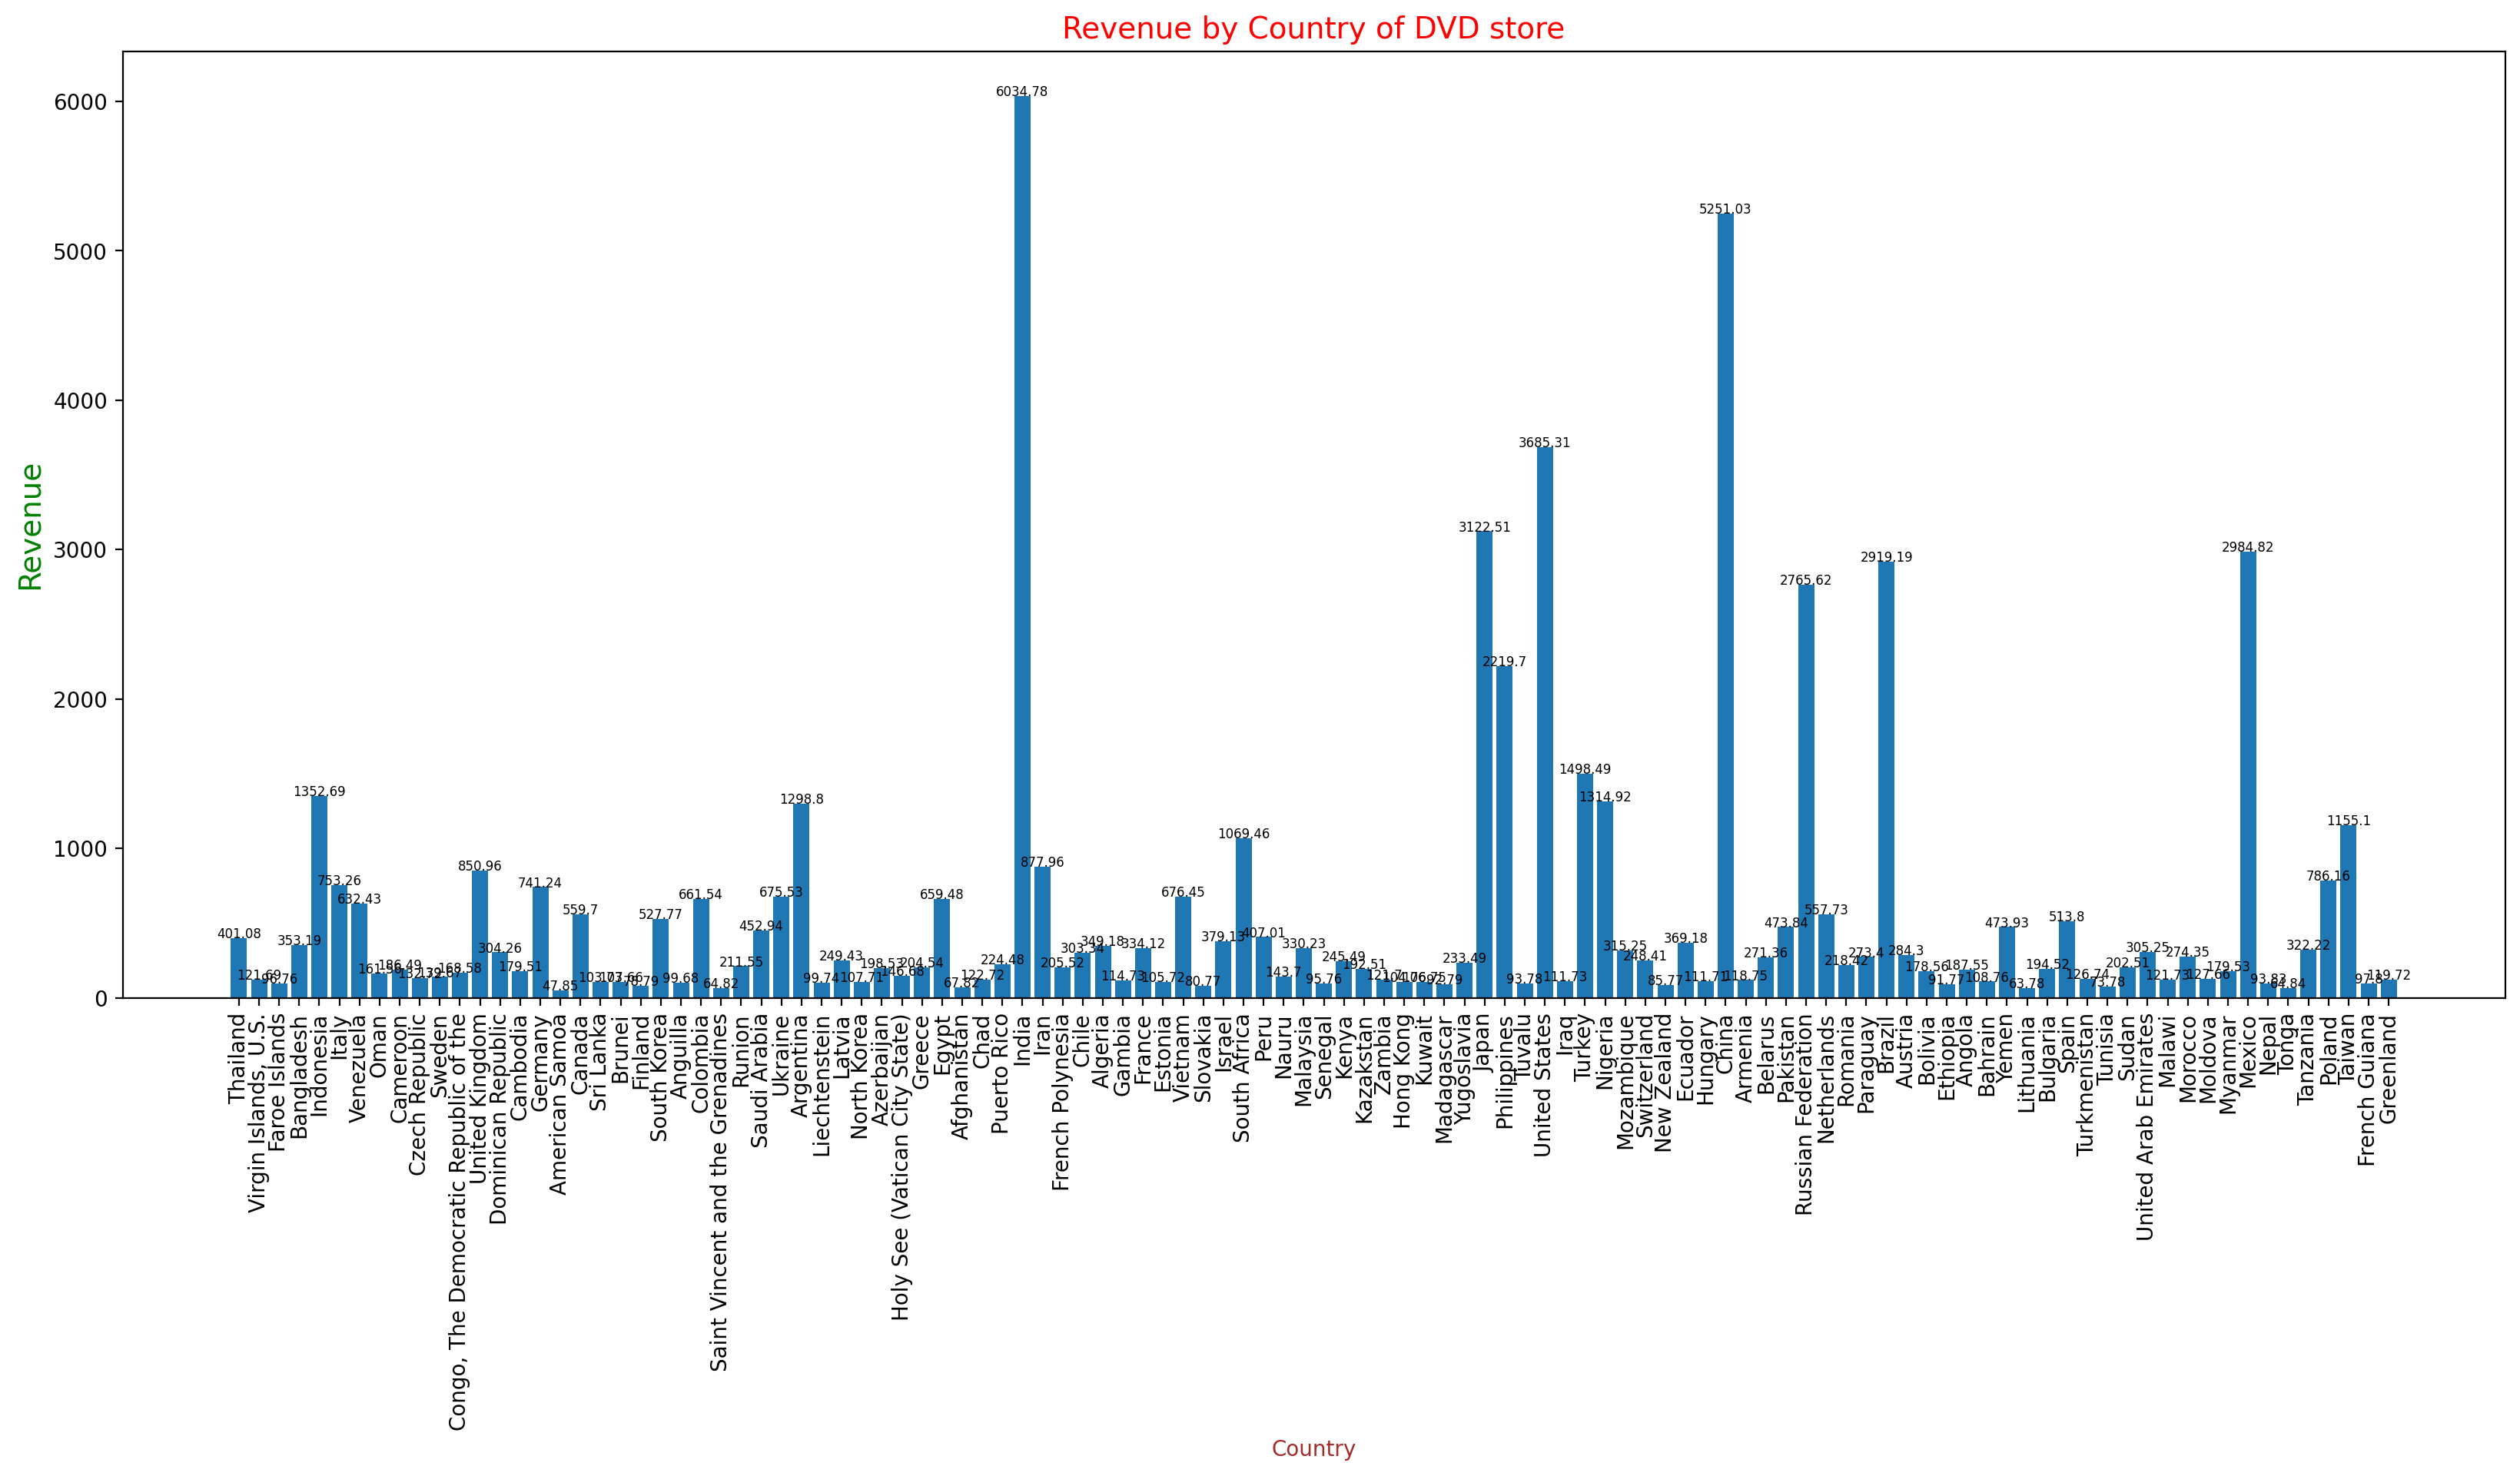

In [15]:
#Task3
#Create a visual in the notebook that shows how much revenue is coming from different countries to the DVD store
#(you will want matplotlib).

import matplotlib.pyplot as plt
import pandas as pd
    
df_country_revenue = pd.read_csv("T3_Total_revenue.csv") 

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize = 6)

#All Brands
x = df_country_revenue["country"]
y = df_country_revenue["total_revenue"]

plt.figure(figsize = (20, 8), dpi= 200)

# calling the function to add value labels
addlabels(x, y)

#Bar Chart
plt.xlabel('Country',  color = 'brown')
plt.ylabel('Revenue', fontsize = 14, color = 'green')
plt.title('Revenue by Country of DVD store', fontsize = 14, color = 'red')
#plt.bar(x, y, width = 0.5)

y_pos = range(len(x))
plt.bar(y_pos, y, width = 0.8)

# Rotation of the bars names
plt.xticks(y_pos, x, rotation = 90)

plt.show()

<Figure size 1600x1000 with 0 Axes>

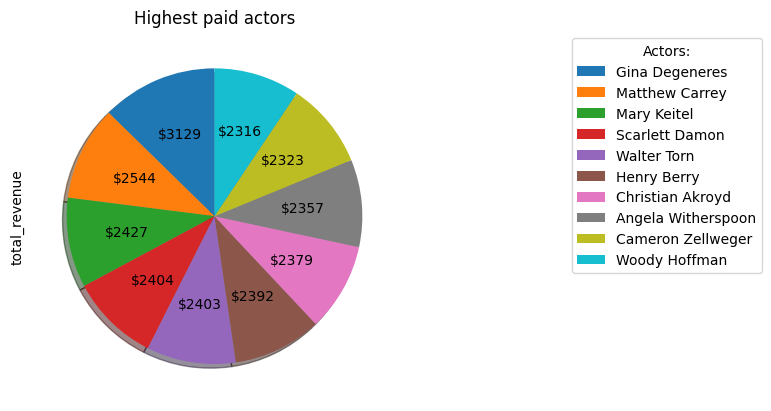

In [16]:
# Task 4
# Do an analysis to show which actors are bringing in the most revenue (top 10 ranked)
import numpy
import matplotlib.ticker as mtick

df_actors_revenue = pd.read_csv("T4_Total_Revenue.csv")

plt.figure(figsize=(16, 10))

f = df_actors_revenue["first_name"]
l = df_actors_revenue["last_name"]
tot_rev = df_actors_revenue["total_revenue"]

def absolute_value(val):
    a  = int(numpy.round(val/100.*tot_rev.sum(), 0))
    return f"${a:1.0f}" # use $ tick

plot = df_actors_revenue.plot.pie(
    y = 'total_revenue', 
    title = 'Highest paid actors', 
    labels = None, # remove the label text on the wedge
    fontsize = 10, 
    startangle = 90, 
    autopct = absolute_value, 
    shadow = True  )

#autopct='%1.2f%%' - transform data into precentage in plot

plt.legend( title = "Actors:", 
            bbox_to_anchor = (1.5, 0, 0.5, 1),
            labels = f +' '+ l
          )
#plt.ylabel("") # remove horizontale y label

plt.show()

<Figure size 1400x800 with 0 Axes>

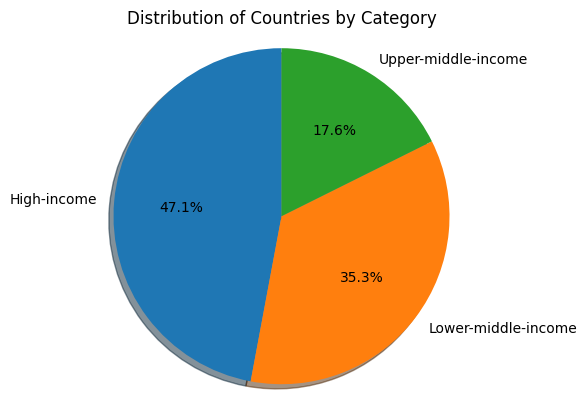

In [18]:
#Task5  Create a new data-frame where you classify some different countries into some categories 
#that make sense to you (8 countries min, 20 max) in this df there will be two columns, one column will give the country name, 
#the other column will give the classification category.
# https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
countries_data = {
    'country': ['Afghanistan',' Algeria','Austria','American Samoa','United States', ' Angola ','United Kingdom', 'Germany', 'Canada', 'France', 'Australia', 'Japan', 'China', 'Brazil', 'India', 'Vietnam','Yemen''Yugoslavia'],
    'Category': ['Lower-middle-income','Lower-middle-income','Lower-middle-income','Lower-middle-income','High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'Upper-middle-income', 'Upper-middle-income', 'Lower-middle-income','Lower-middle-income','Upper-middle-income']
}

#Create the DataFrame using dictionary keys as rows
df = pd.DataFrame(countries_data)
# print(df)

plt.figure(figsize=(14, 8)) 

location_counts = df['Category'].value_counts()

fig, ax = plt.subplots()

# myexplode = (0.1, 0.1, 0, 0)
ax.pie(location_counts.values, explode=None, labels = location_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

#plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Countries by Category')
plt.axis('equal')

plt.show()

In [22]:
x = countries_data.items()
#Output dictionary Items
print(x)

dict_items([('country', ['Afghanistan', ' Algeria', 'Austria', 'American Samoa', 'United States', ' Angola ', 'United Kingdom', 'Germany', 'Canada', 'France', 'Australia', 'Japan', 'China', 'Brazil', 'India', 'Vietnam', 'YemenYugoslavia']), ('Category', ['Lower-middle-income', 'Lower-middle-income', 'Lower-middle-income', 'Lower-middle-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'High-income', 'Upper-middle-income', 'Upper-middle-income', 'Lower-middle-income', 'Lower-middle-income', 'Upper-middle-income'])])


In [23]:
print(len(countries_data))

2


In [26]:
#Output total number of keys and values
print(sum(len(v) for v in countries_data.values()))

34


In [25]:
#Counting how many values were attributed to a key in a python dictionary 
for key, value in countries_data.items():
    #print value
   print(key, len(list(filter(bool, value))))

country 17
Category 17


In [28]:
#Task5 Use an appropriate merge to merge that new data-frame from the last step with a dataframe from the dvd db, 
#that gives the countries, so now countries are connected with their classification. 
#(no need to add this table back to the postgresql db, just doing it in the notebook is fine)


# Check data from a table with Column named Country
# df.get('Country')      
dvd_df = pd.read_csv('T6_merge_countries.csv')

df3 = df.merge(dvd_df, on = 'country', how = 'left')

print(df3)

            country             Category
0       Afghanistan  Lower-middle-income
1           Algeria  Lower-middle-income
2           Austria  Lower-middle-income
3    American Samoa  Lower-middle-income
4     United States          High-income
5           Angola           High-income
6    United Kingdom          High-income
7           Germany          High-income
8            Canada          High-income
9            France          High-income
10        Australia          High-income
11            Japan          High-income
12            China  Upper-middle-income
13           Brazil  Upper-middle-income
14            India  Lower-middle-income
15          Vietnam  Lower-middle-income
16  YemenYugoslavia  Upper-middle-income


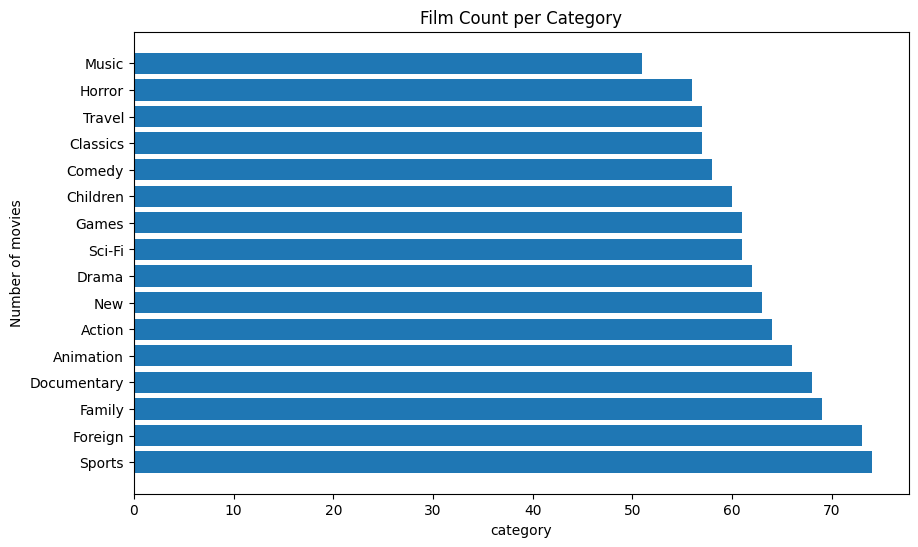

In [29]:
#Task7 Count movies according to category name from DVD dataset. Create a barh chart. 

import numpy as np

df_count_category = pd.read_csv('T7_count_movie_category.csv') 

plt.figure(figsize=(10, 6))
plt.barh(df_count_category['category_name'], df_count_category['film_count'])
plt.xlabel('category')
plt.ylabel('Number of movies')
plt.title('Film Count per Category')
plt.show()

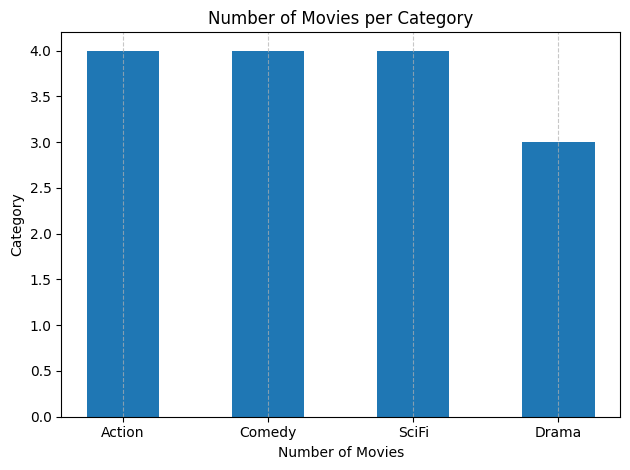

In [33]:
#Task8 
# Create a new data-frame where you classify some different movies into some categories 
# Count movies according to category name. Create a bar chart.
# no need to add this table back to the postgresql db, just doing it in the notebook is fine)

from collections import Counter

movies = [
    {"title": "Movie 1", "category": "Action"},
    {"title": "Movie 2", "category": "Comedy"},
    {"title": "Movie 3", "category": "Action"},
    {"title": "Movie 4", "category": "SciFi"},
    {"title": "Movie 5", "category": "Drama"},
    {"title": "Movie 6", "category": "Comedy"},
    {"title": "Movie 7", "category": "Action"},
    {"title": "Movie 8", "category": "Drama"},
    {"title": "Movie 9", "category": "Action"},
    {"title": "Movie 10", "category": "Comedy"},
    {"title": "Movie 11", "category": "Drama"},
    {"title": "Movie 12", "category": "SciFi"},
    {"title": "Movie 13", "category": "SciFi"},
    {"title": "Movie 14", "category": "SciFi"},
    {"title": "Movie 15", "category": "Comedy"}
]

# Count movies per category
category_counts = Counter(movie['category'] for movie in movies)

import matplotlib.pyplot as plt

# Extract category names and counts
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Create the barh plot
plt.bar(categories, counts, width = 0.5)

# Customize the plot
plt.xlabel("Number of Movies")
plt.ylabel("Category")
plt.title("Number of Movies per Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()
plt.show()

In [55]:
# Task9 Use assign() to run a lambda function on one columns
  
# creating and initializing a list
values= [['Apple',490],['Motorola',250],['Samsunsg',495],
         ['Sony',400],['Xiaomi',350],['Nokia',380]]
 
# creating a pandas dataframe
df_9 = pd.DataFrame(values,columns=['Name','Total_Marks'])
 
# Applying lambda function to find
# percentage of 'Total_Marks' column
# using df.assign()
df_9 = df_9.assign(Percentage = lambda x: (x['Total_Marks'] /500 * 100))
 
# displaying the data frame sort decending by % column
df_9.sort_values(by='Percentage',ascending=False)

,Name,Total_Marks,Percentage
2,Samsunsg,495,99.0
0,Apple,490,98.0
3,Sony,400,80.0
5,Nokia,380,76.0
4,Xiaomi,350,70.0
1,Motorola,250,50.0


In [4]:
#Task 10. Use assign() to run a lambda function on two columns
import pandas as pd

df_10 = pd.DataFrame(
    [
        ['John','2020-01-01', 40, 5000],
        ['Tom', '2020-01-02', 45, 5500],
        ['Gaby','2020-01-03', 50, 4800],
        ['Rony','2020-01-04', 60, 6200],
    ], 
    columns=['Employer','Date', 'Hours/week', 'Salary/month']
)
df_10 

,Employer,Date,Hours/week,Salary/month
0,John,2020-01-01,40,5000
1,Tom,2020-01-02,45,5500
2,Gaby,2020-01-03,50,4800
3,Rony,2020-01-04,60,6200


In [5]:
#Task10 continue
#set the decimal number display precision 2 numb after decimal point
pd.options.display.float_format = '{:.2f}'.format

df_10  = (df_10
          .assign(
                    Monthly_H = lambda x: x['Hours/week'] * 4,
                    Payment_h = lambda x: x['Salary/month'] / (x['Hours/week'] *4)
                  )
     )
# Allign column headers and the content of all the columns on left side 
# df = df.style.set_properties(**{'text-align': 'left'})
# df = left_aligned_df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

df_10 

,Employer,Date,Hours/week,Salary/month,Monthly_H,Payment_h
0,John,2020-01-01,40,5000,160,31.25
1,Tom,2020-01-02,45,5500,180,30.56
2,Gaby,2020-01-03,50,4800,200,24.00
3,Rony,2020-01-04,60,6200,240,25.83
